In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

In [6]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [7]:
mvps = pd.read_csv("mvps.csv", encoding="latin-1", delimiter=";")
mvps

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,37.1,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6,476,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,37.3,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0,142,960,0.148,82,40.3,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,WAS,0,5,1010,0.005,65,36.4,22.2,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,12,Ben Simmons,24,PHI,0,3,1010,0.003,58,32.4,14.3,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,13T,James Harden,31,TOT,0,1,1010,0.001,44,36.6,24.6,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13T,LeBron James,36,LAL,0,1,1010,0.001,45,33.4,25.0,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [8]:
modified_mvps = mvps[["PTS", "AST"]]
modified_mvps

,PTS,AST
0,31.5,5.5
1,19.4,12.5
2,25.6,2.5
3,27.6,4.2
4,29.0,3.3
...,...,...
469,22.2,11.7
470,14.3,6.9
471,24.6,10.8
472,25.0,7.8


In [9]:
modified_mvps.dropna()

,PTS,AST
0,31.5,5.5
1,19.4,12.5
2,25.6,2.5
3,27.6,4.2
4,29.0,3.3
...,...,...
469,22.2,11.7
470,14.3,6.9
471,24.6,10.8
472,25.0,7.8


In [10]:
kmeans = KMeans(n_clusters=2).fit(modified_mvps)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[26.24244898  4.90489796]
 [18.07991266  5.54148472]]
[0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0
 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1
 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 

/var/folders/pl/z7hlc6490djfyyn1vqgbb89r0000gn/T/ipykernel_29841/3960818063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_mvps['labels'] = labels


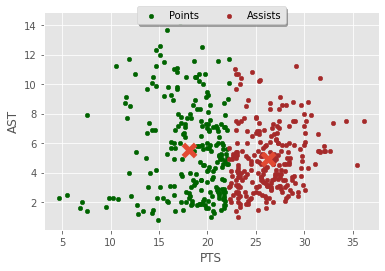

In [14]:
modified_mvps['labels'] = labels


group1 = modified_mvps[modified_mvps['labels']==1].plot( kind='scatter', x='PTS', y='AST', color='DarkGreen', label="Points" )
group2 = modified_mvps[modified_mvps['labels']==0].plot( kind='scatter', x='PTS', y='AST', color='Brown', ax=group1, label="Assists" )
group1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

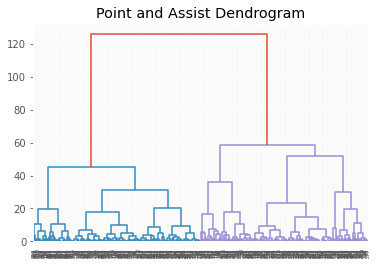

In [24]:
plt.title("Point and Assist Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(modified_mvps, method='ward'))

In [17]:
agg_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_model.fit(modified_mvps)
labels = agg_model.labels_

In [18]:
print(labels)

[4 0 2 2 2 3 0 2 0 1 2 0 0 1 3 2 1 3 0 3 4 2 2 2 2 2 1 0 3 1 3 2 0 0 0 3 3
 2 2 4 2 2 2 2 2 0 3 3 2 3 0 2 4 3 2 2 1 3 2 1 3 0 0 1 3 0 2 3 2 2 2 2 2 2
 3 0 3 3 2 1 0 3 3 4 2 3 2 3 0 2 3 0 2 0 2 1 2 1 0 2 2 4 3 0 2 3 2 2 1 2 3
 3 1 2 0 3 3 2 0 3 2 2 0 2 3 0 3 3 3 3 2 2 0 0 2 3 3 3 0 2 3 3 2 0 2 3 3 0
 3 3 1 3 1 1 3 1 0 3 3 1 4 2 3 2 2 2 2 2 2 2 0 2 1 2 3 3 4 2 2 2 3 2 2 0 2
 1 3 2 2 4 3 1 0 2 0 2 2 2 0 2 2 4 1 2 3 2 0 3 1 3 3 2 2 4 4 2 2 2 1 0 2 3
 1 2 2 2 3 2 2 3 1 0 3 0 2 3 1 3 3 3 0 2 2 3 4 4 2 2 2 2 2 2 2 1 1 3 0 4 2
 4 0 4 2 3 3 4 3 2 0 4 3 4 2 2 2 3 2 1 3 4 3 2 0 3 2 0 3 4 3 2 3 3 0 3 2 0
 2 3 3 3 1 4 2 4 3 0 1 3 3 2 2 3 3 4 2 2 3 4 2 2 0 0 2 1 3 2 3 3 2 2 4 2 2
 2 2 3 2 2 0 1 0 4 2 0 2 0 2 3 0 0 3 3 3 2 1 3 4 2 2 0 4 0 3 2 2 3 2 1 1 1
 3 1 4 4 2 1 2 2 0 3 3 2 2 1 1 3 2 3 1 2 4 2 4 2 0 2 3 3 1 1 3 4 3 2 0 2 0
 1 2 4 3 4 4 2 4 4 2 2 0 2 2 2 4 4 2 4 0 2 2 2 2 2 4 2 2 2 4 2 0 2 2 2 2 2
 0 1 4 4 0 4 4 2 2 1 4 0 2 3 2 4 2 4 2 0 4 4 2 1 1 0 1 0 2 2]


In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

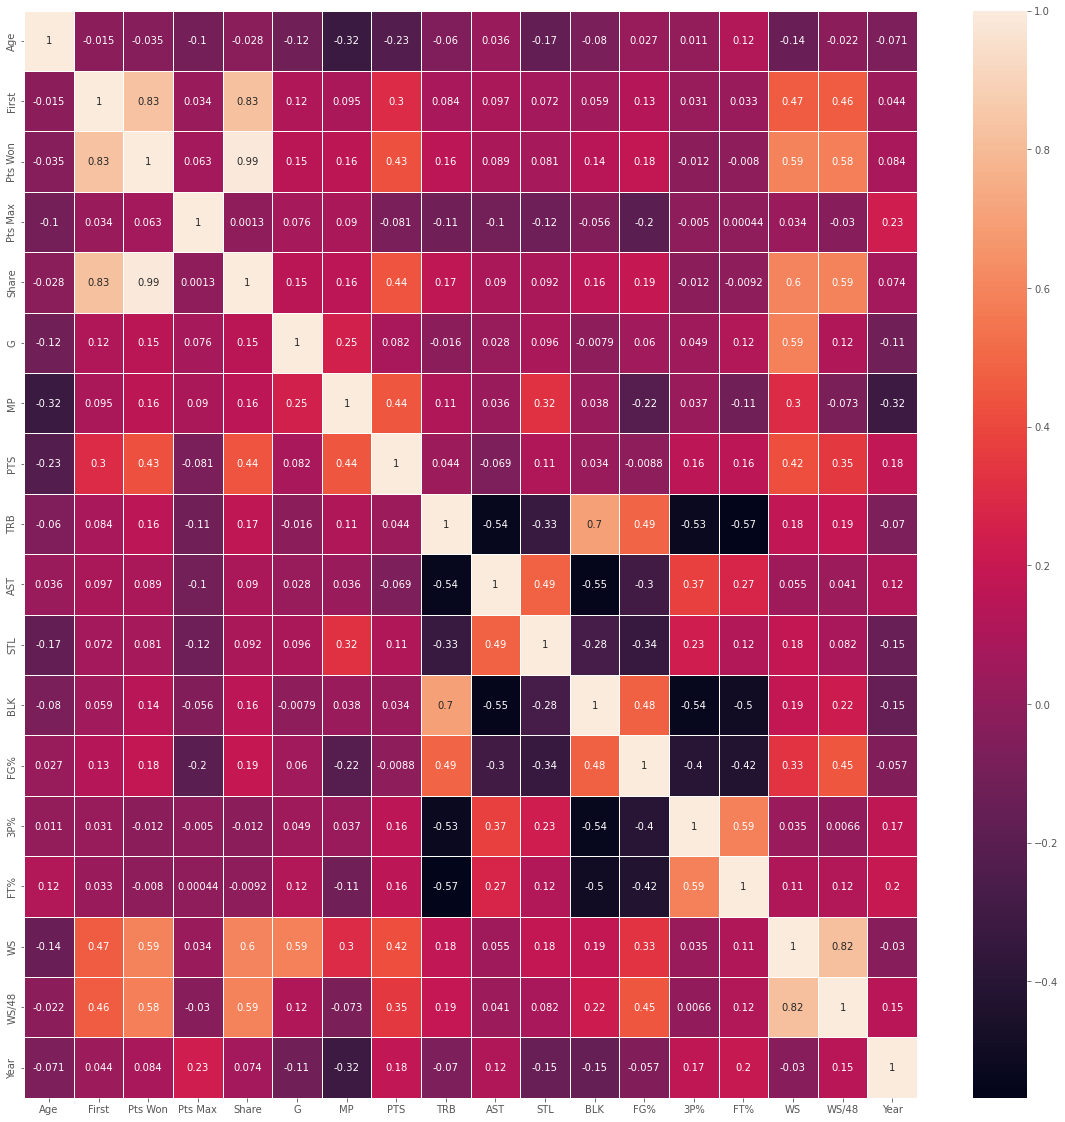

In [26]:
plt.figure(figsize(20,20))
sns.heatmap(mvps.corr(), annot=True, linewidth=0.5)

<AxesSubplot:xlabel='PTS', ylabel='AST'>

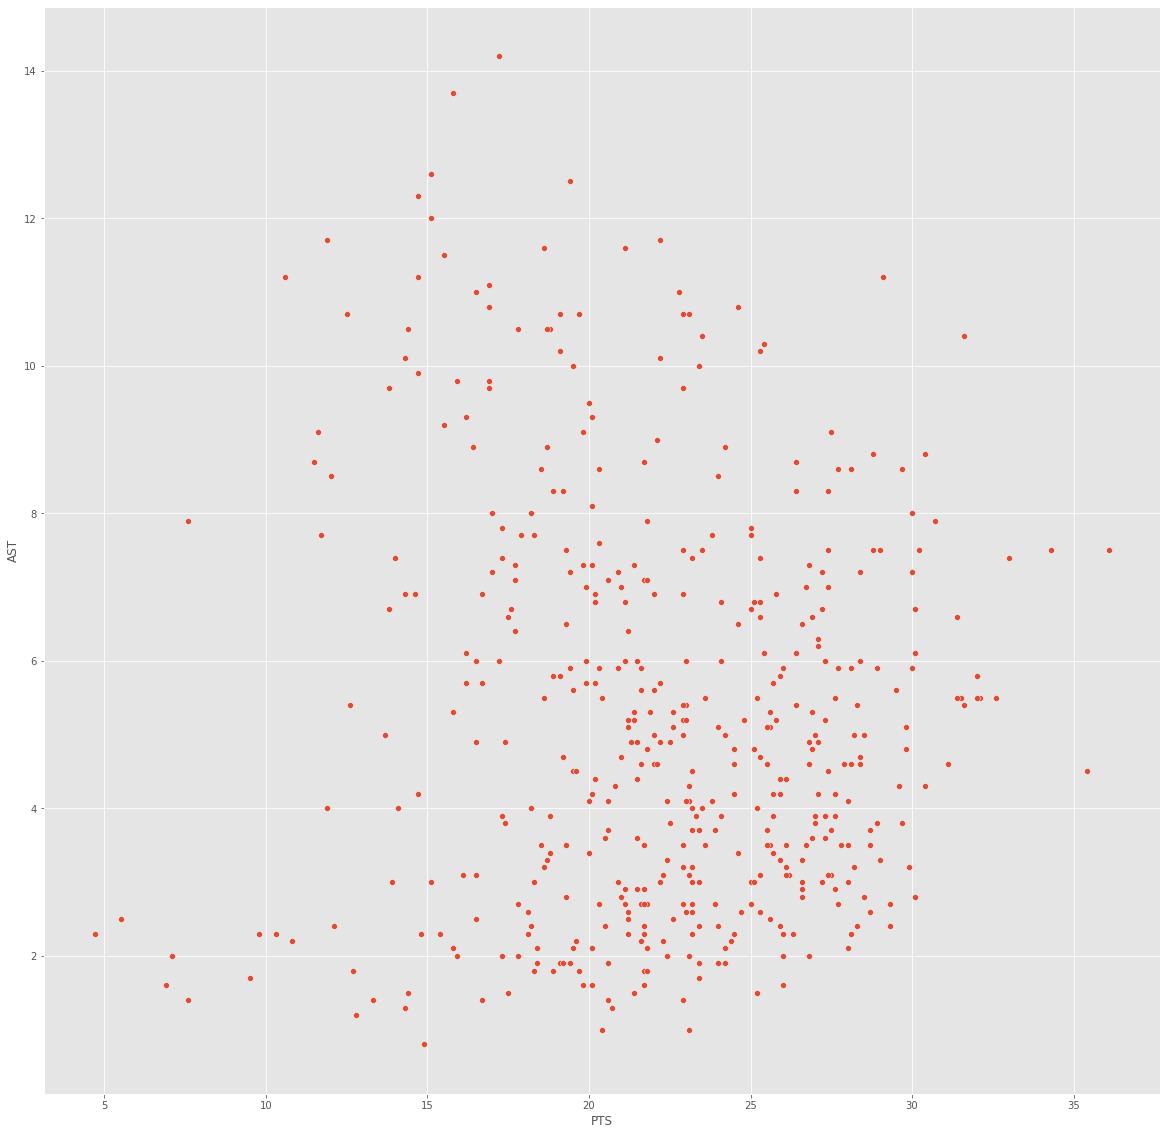

In [27]:
sns.scatterplot(data=mvps, x="PTS", y="AST")